# Data preprocessing and models training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/homedepot_data/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('/content/drive/MyDrive/homedepot_data/test.csv', encoding="ISO-8859-1")
df_attr = pd.read_csv('/content/drive/MyDrive/homedepot_data/attributes.csv')
df_pro_desc = pd.read_csv('/content/drive/MyDrive/homedepot_data/product_descriptions.csv')

In [ ]:
num_train = df_train.shape[0]
num_test = df_test.shape[0]
num_train, num_test

(74067, 166693)

In [ ]:
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)
df_all = pd.merge(df_all, df_attr, how='left', on='product_uid')
df_all['value'] = df_all['value'].astype(str)

In [ ]:
import re
def extract_numbers_and_units(text):
    pattern = r'(\b\d+[-/\.]?\d*\s*(in\.?|ft\.?|lb\.?|sq\.ft\.?|cu\.ft\.?|gal\.?|oz\.?|cm\.?|mm\.?|deg\.?|volt\.?|watt\.?|amp\.?|°|degrees?)?(\s*/\s*\d+[-/\.]?\d*)?)'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    return ' '.join([match[0] for match in matches])
df_all['value'] = df_all['value'].apply(extract_numbers_and_units)

In [ ]:
df_all['relevance'] = df_all['relevance'].fillna('NaN')

#  groupping values by searc term - product title pairs
df_grouped = df_all.groupby(['product_uid', 'product_title', 'search_term', 'relevance']).agg({
    'value': lambda x: '!'.join(filter(None, x))
}).reset_index()

In [ ]:
df_grouped

,product_uid,product_title,search_term,relevance,value
0,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...
1,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...
2,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.5,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...
3,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...
4,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...
...,...,...,...,...,...
240742,224424,stufurhome Norma 24 in. W x 16 in. D x 34 in. ...,24 whtie storage cabinet,NaN,2 !1 !3 !1!2!0!24
240743,224425,Home Decorators Collection 49 in. D Alessandro...,adirondeck cusion,NaN,49 in!2 in!20.5 in!2 in. 20.5 in. 49 in.!18 in...
240744,224426,Simpson Strong-Tie HB 3-1/2 x 14 in. Top Flang...,hb,NaN,
240745,224427,1/4 in. -20 tpi x 1-1/2 in. Stainless Steel Bu...,hex sockets,NaN,


In [ ]:
# extract numbers and units from search term, product title, and value columns
df_grouped['numbers_units_search_term'] = df_grouped['search_term'].apply(extract_numbers_and_units)
df_grouped['numbers_units_product_title'] = df_grouped['product_title'].apply(extract_numbers_and_units)
df_grouped['numbers_units_value'] = df_grouped['value'].apply(extract_numbers_and_units)

In [ ]:
df_grouped

,product_uid,product_title,search_term,relevance,value,numbers_units_search_term,numbers_units_product_title,numbers_units_value
0,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,90 deg,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...
1,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...
2,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.5,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...
3,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...
4,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...
...,...,...,...,...,...,...,...,...
240742,224424,stufurhome Norma 24 in. W x 16 in. D x 34 in. ...,24 whtie storage cabinet,NaN,2 !1 !3 !1!2!0!24,24,24 in. 16 in. 34 in.,2 1 3 1 2 0 24
240743,224425,Home Decorators Collection 49 in. D Alessandro...,adirondeck cusion,NaN,49 in!2 in!20.5 in!2 in. 20.5 in. 49 in.!18 in...,,49 in.,49 in 2 in 20.5 in 2 in. 20.5 in. 49 in. 18 in...
240744,224426,Simpson Strong-Tie HB 3-1/2 x 14 in. Top Flang...,hb,NaN,,,3-1/2 14 in.,
240745,224427,1/4 in. -20 tpi x 1-1/2 in. Stainless Steel Bu...,hex sockets,NaN,,,1/4 in. 20 1-1/2 2,


In [ ]:
df_grouped['com_pair'] = df_grouped.apply(lambda row: len(set(row['numbers_units_search_term']).intersection(row['numbers_units_product_title'])), axis=1)
# check if common numbers and units are present in the value column
def check_common_values(row):
    common_values = set()
    search_term_values = set(row['numbers_units_search_term'])
    value_values = set(row['numbers_units_value'])
    for value in search_term_values:
        for value_in_value in value_values:
            if value.strip() and value_in_value.strip() and value == value_in_value:
                common_values.add(value)
                break  # Once a match is found, move to the next value in the search term
    return 1 if len(common_values)>0 else 0

df_grouped['com_st_val'] = df_grouped.apply(check_common_values, axis=1)

# aggregate the results for each search term - product title pair
# df_grouped = df_grouped.groupby(['product_uid', 'product_title', 'search_term', 'relevance']).agg({'com_pair': 'sum', 'com_st_val': 'sum'}).reset_index()

In [ ]:
df_grouped

,product_uid,product_title,search_term,relevance,value,numbers_units_search_term,numbers_units_product_title,numbers_units_value,com_pair,com_st_val
0,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,90 deg,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...,0,1
1,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...,0,0
2,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.5,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...,0,0
3,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...,0,0
4,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able,NaN,90°!3 in. 3 in. 1-1/2!12-!10 9 1-1/2!12!1!1.5...,,12-,90° 3 in. 3 in. 1-1/2 12- 10 9 1-1/2 12 1 1...,0,0
...,...,...,...,...,...,...,...,...,...,...
240742,224424,stufurhome Norma 24 in. W x 16 in. D x 34 in. ...,24 whtie storage cabinet,NaN,2 !1 !3 !1!2!0!24,24,24 in. 16 in. 34 in.,2 1 3 1 2 0 24,3,1
240743,224425,Home Decorators Collection 49 in. D Alessandro...,adirondeck cusion,NaN,49 in!2 in!20.5 in!2 in. 20.5 in. 49 in.!18 in...,,49 in.,49 in 2 in 20.5 in 2 in. 20.5 in. 49 in. 18 in...,0,0
240744,224426,Simpson Strong-Tie HB 3-1/2 x 14 in. Top Flang...,hb,NaN,,,3-1/2 14 in.,,0,0
240745,224427,1/4 in. -20 tpi x 1-1/2 in. Stainless Steel Bu...,hex sockets,NaN,,,1/4 in. 20 1-1/2 2,,0,0


In [ ]:
df_selected = df_grouped[['relevance', 'com_pair', 'com_st_val']]
# df_selected.to_csv('stemmed_attr.csv')
# !cp stemmed_attr.csv "drive/My Drive/"

In [ ]:
df_selected

,relevance,com_pair,com_st_val
0,NaN,0,1
1,3.0,0,0
2,2.5,0,0
3,NaN,0,0
4,NaN,0,0
...,...,...,...
240742,NaN,3,1
240743,NaN,0,0
240744,NaN,0,0
240745,NaN,0,0


In [ ]:
import numpy as np
test_df = df_selected[np.where(df_selected['relevance']=='NaN', True, False)]
train_df = df_selected[np.where(df_selected['relevance']!='NaN', True, False)]

In [ ]:
# scaling numerical variables
target = train_df['relevance']
data = train_df.drop(columns='relevance')
from sklearn.model_selection import train_test_split
data_train, data_test, tar_train, tar_test = train_test_split(data, target, random_state=42)

In [ ]:
# model fitting
data_train.describe()

,com_pair,com_st_val
count,55550.000000,55550.000000
mean,0.634275,0.171503
std,1.449293,0.376951
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,12.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(data_train) # 2 arguments - data matrix and target values
scaler.mean_

array([0.63427543, 0.17150315])

In [ ]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled.describe()

,com_pair,com_st_val
count,5.555000e+04,5.555000e+04
mean,4.643151e-17,2.008195e-17
std,1.000009e+00,1.000009e+00
min,-4.376486e-01,-4.549782e-01
25%,-4.376486e-01,-4.549782e-01
50%,-4.376486e-01,-4.549782e-01
75%,-4.376486e-01,-4.549782e-01
max,7.842324e+00,2.197907e+00


In [ ]:
# pipeline creation
import time
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
rf_model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

In [ ]:
start = time.time()
model.fit(data_train_scaled, tar_train)
rf_model.fit(data_train_scaled, tar_train)
elapsed_time = time.time() - start

In [ ]:
model_name = model.__class__.__name__
score = model.score(data_test, tar_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
)

The accuracy using a Pipeline is -0.006 with a fitting time of 0.739 seconds 


In [ ]:
predictions = rf_model.predict(data_test)
results_df = pd.DataFrame({
    'Actual': tar_test,
    'Predicted': predictions
})
results_df

,Actual,Predicted
41857,3.0,2.336989
91108,2.67,2.406977
62382,2.67,2.536120
16208,2.67,2.336989
151446,2.0,2.336989
...,...,...
180251,2.33,2.336989
29411,2.33,2.310213
55773,2.33,2.336989
114740,3.0,2.389756


          Predicted
count  18517.000000
mean       2.347496
std        0.046498
min        2.009046
25%        2.336989
50%        2.336989
75%        2.336989
max        2.606129


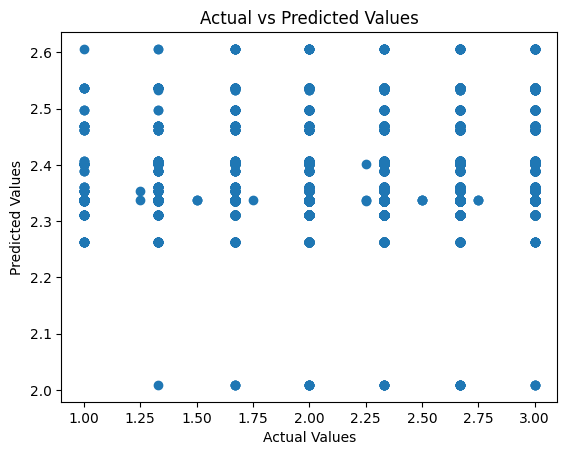

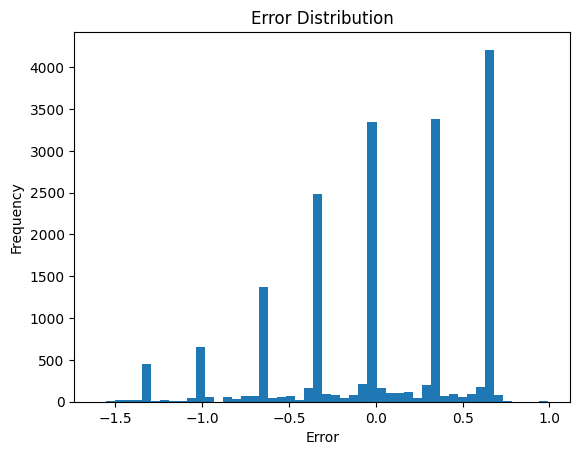

In [ ]:
import matplotlib.pyplot as plt

# calculate the errors
results_df['Error'] = results_df['Actual'] - results_df['Predicted']

# summary statistics
print(results_df.describe())

# scatter plot of actual vs predicted values
plt.scatter(results_df['Actual'], results_df['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

plt.hist(results_df['Error'], bins=50)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()


In [ ]:
y_train_pred = rf_model.predict(data_train_scaled)
y_test_pred = rf_model.predict(data_test)
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(tar_train, y_train_pred)
test_mse = mean_squared_error(tar_test, y_test_pred)
train_r2 = r2_score(tar_train, y_train_pred)
test_r2 = r2_score(tar_test, y_test_pred)
print(f'training Mean Squared Error: {train_mse}')
print(f'test Mean Squared Error: {test_mse}')

training Mean Squared Error: 0.2826037275045696
test Mean Squared Error: 0.28816421595133185


In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, data_train_scaled, tar_train, cv=5, scoring='neg_mean_squared_error')

cv_mse = -cv_scores.mean()
print(f"Cross-Validation Mean Squared Error: {cv_mse}")


Cross-Validation Mean Squared Error: 0.2828417028304505


In [ ]:
# hyperparameter tunning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
xg = xgb.XGBRegressor()

grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(data_train, tar_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation MSE: {abs(best_score)}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Best cross-validation MSE: 0.2831160103248758


# Data exploration

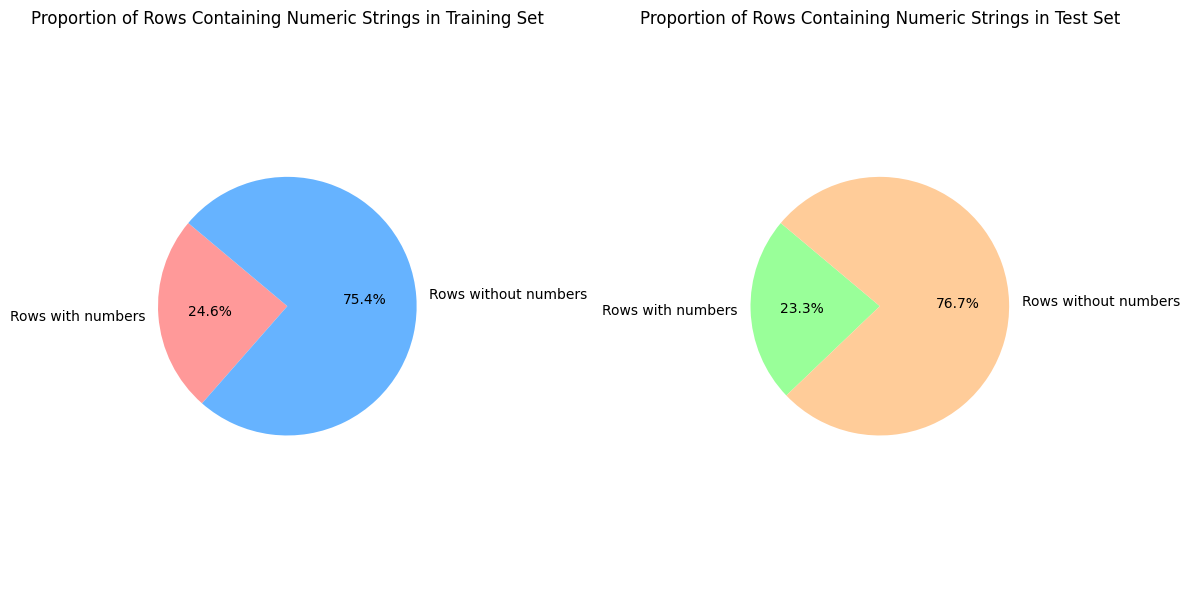

In [ ]:
# get percentage of rows containing number
number_pattern = r'\d+'
contains_number_tr = df_train['search_term'].str.contains(number_pattern, regex=True)
num_rows_with_number_tr = contains_number_tr.sum()
total_rows_tr = df_train.shape[0]
rows_without_numeric_tr = total_rows_tr - num_rows_with_number_tr

contains_number_te = df_test['search_term'].str.contains(number_pattern, regex=True)
num_rows_with_number_te = contains_number_te.sum()
total_rows_te = df_test.shape[0]
rows_without_numeric_te = total_rows_te - num_rows_with_number_te

labels = ['Rows with numbers', 'Rows without numbers']
sizes_tr = [num_rows_with_number_tr, rows_without_numeric_tr]
sizes_te = [num_rows_with_number_te, rows_without_numeric_te]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sizes_tr, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.axis('equal')
plt.title('Proportion of Rows Containing Numeric Strings in Training Set')

plt.subplot(1, 2, 2)
plt.pie(sizes_te, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#99ff99','#ffcc99'])
plt.axis('equal')
plt.title('Proportion of Rows Containing Numeric Strings in Test Set')

# Display the plot
plt.tight_layout()
plt.show()

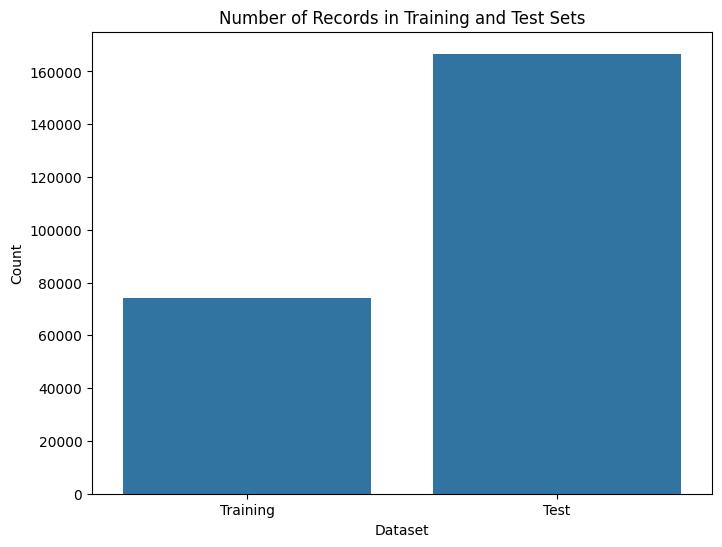

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_counts = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Count': [len(df_train), len(df_test)]
})


plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Count', data=data_counts)
plt.title('Number of Records in Training and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

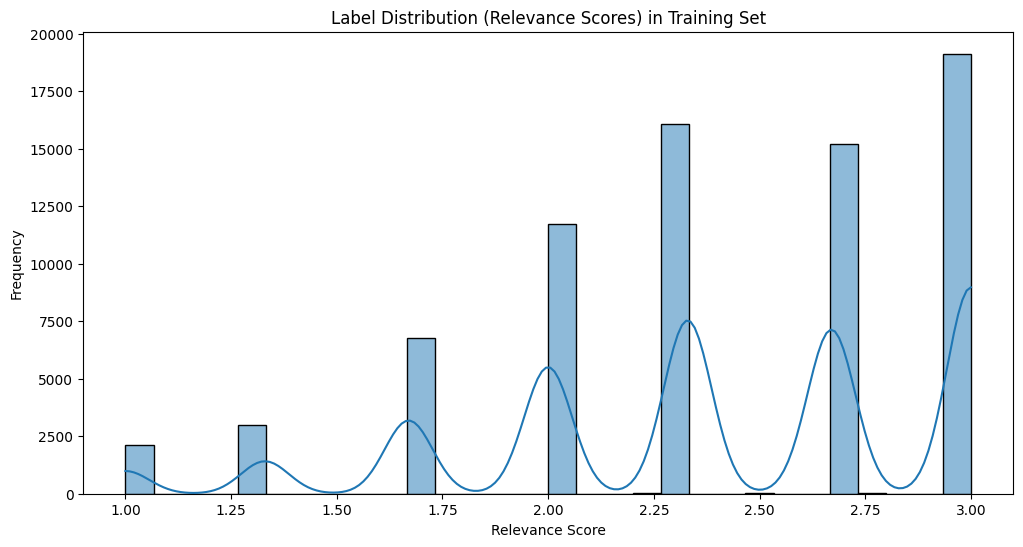

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_train['relevance'], bins=30, kde=True)
plt.title('Label Distribution (Relevance Scores) in Training Set')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

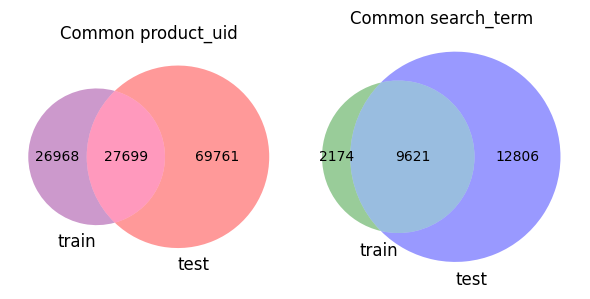

In [ ]:
# common number of product_uid and search quieries
from matplotlib_venn import venn2
plt.figure(figsize=(6, 4))
labels = ['train', 'test']

plt.subplot(1, 2, 1)
venn2([set(df_train["product_uid"]), set(df_test["product_uid"])], set_labels=labels, set_colors=('purple', 'red'))
plt.title('Common product_uid')

plt.subplot(1, 2, 2)
venn2([set(df_train["search_term"]), set(df_test["search_term"])], set_labels=labels, set_colors=('green', 'blue'))
plt.title('Common search_term')

plt.tight_layout()
plt.show()


# LSTM tunning

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/homedepot_data/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('/content/drive/MyDrive/homedepot_data/test.csv', encoding="ISO-8859-1")
df_pro_desc = pd.read_csv('/content/drive/MyDrive/homedepot_data/product_descriptions.csv')

LSTM with scaling

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

df_train = pd.merge(df_train, df_pro_desc, how='left', on='product_uid')
df_test = pd.merge(df_test, df_pro_desc, how='left', on='product_uid')

df_train['text'] = df_train['search_term'] + ' ' + df_train['product_title'] + ' ' + df_train['product_description']
df_test['text'] = df_test['search_term'] + ' ' + df_test['product_title'] + ' ' + df_test['product_description']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text'])
X_train_seq = tokenizer.texts_to_sequences(df_train['text'])
X_test_seq = tokenizer.texts_to_sequences(df_test['text'])

max_seq_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

y_train = df_train['relevance'].values

scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_padded, y_train_scaled, test_size=0.2, random_state=42)


num_words = len(tokenizer.word_index) + 1
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_seq_length))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[rmse])


history = model.fit(X_train_split, y_train_split, epochs=10, batch_size=32, validation_split=0.2)

loss, rmse_value = model.evaluate(X_val_split, y_val_split)
print(f"Validation Loss: {loss}, RMSE: {rmse_value}")


y_test_pred = model.predict(X_test_padded)


y_test_pred_rescaled = scaler.inverse_transform(y_test_pred).reshape(-1)

# submission = pd.DataFrame({"id": df_test['id'], "relevance": y_test_pred_rescaled})
# submission.to_csv('submission.csv', index=False)

Epoch 1/10
1482/1482 [==============================] - 1599s 1s/step - loss: 0.0740 - rmse: 0.2686 - val_loss: 0.0705 - val_rmse: 0.2641
Epoch 2/10
1482/1482 [==============================] - 1584s 1s/step - loss: 0.0610 - rmse: 0.2451 - val_loss: 0.0701 - val_rmse: 0.2630
Epoch 3/10
1482/1482 [==============================] - 1588s 1s/step - loss: 0.0492 - rmse: 0.2196 - val_loss: 0.0768 - val_rmse: 0.2755
Epoch 4/10
1482/1482 [==============================] - 1604s 1s/step - loss: 0.0424 - rmse: 0.2035 - val_loss: 0.0850 - val_rmse: 0.2893
Epoch 5/10
1482/1482 [==============================] - 1615s 1s/step - loss: 0.0379 - rmse: 0.1922 - val_loss: 0.0788 - val_rmse: 0.2787
Epoch 6/10
1482/1482 [==============================] - 1610s 1s/step - loss: 0.0350 - rmse: 0.1845 - val_loss: 0.0840 - val_rmse: 0.2878
Epoch 7/10
1482/1482 [==============================] - 1637s 1s/step - loss: 0.0326 - rmse: 0.1781 - val_loss: 0.0837 - val_rmse: 0.2872
Epoch 8/10
1482/1482 [============

Cross-validation

In [ ]:
# score calculating function
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

df_train = pd.merge(df_train, df_pro_desc, how='left', on='product_uid')
df_test = pd.merge(df_test, df_pro_desc, how='left', on='product_uid')

df_train['text'] = df_train['search_term'] + ' ' + df_train['product_title'] + ' ' + df_train['product_description']
df_test['text'] = df_test['search_term'] + ' ' + df_test['product_title'] + ' ' + df_test['product_description']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text'])
X_train_seq = tokenizer.texts_to_sequences(df_train['text'])
X_test_seq = tokenizer.texts_to_sequences(df_test['text'])

In [ ]:
# sequences padding
max_seq_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

y_train = df_train['relevance'].values
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)

In [ ]:
# defining model parameters
def create_model(learning_rate=0.001, lstm_units=50, dropout_rate=0.2):
    num_words = len(tokenizer.word_index) + 1
    embedding_dim = 50
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_seq_length))
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=rmse, metrics=['mse'])
    return model

In [ ]:
num_words

174278

In [ ]:
# k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for fold, (train_index, val_index) in enumerate(kf.split(X_train_padded)):
  print(f'fold {fold+1}')
  X_train_split, X_val_split = X_train_padded[train_index], X_train_padded[val_index]
  y_train_split, y_val_split = y_train_scaled[train_index], y_train_scaled[val_index]
  model = create_model()
  checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
  early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
  history = model.fit(X_train_split, y_train_split,
                    epochs=5, batch_size=32,
                    validation_split=0.2,
                    validation_data=(X_val_split, y_val_split),
                    callbacks=[checkpoint, early_stopping])
  loss, rmse_value = model.evaluate(X_val_split, y_val_split)
  print(f"Validation Loss: {loss}, RMSE: {rmse_value}")

  # predict on test data
  y_test_pred = model.predict(X_test_padded)
  y_test_pred_rescaled = scaler.inverse_transform(y_test_pred).reshape(-1)

  # save predictions
  submission = pd.DataFrame({"id": df_test['id'], "relevance": y_test_pred_rescaled})
  submission.to_csv(f'submission_fold_{fold + 1}.csv', index=False)

fold 1
Epoch 1/5
1852/1852 [==============================] - 1931s 1s/step - loss: 0.2728 - mse: 0.0764 - val_loss: 0.2623 - val_mse: 0.0701
Epoch 2/5
1852/1852 [==============================] - 1920s 1s/step - loss: 0.2493 - mse: 0.0631 - val_loss: 0.2631 - val_mse: 0.0703
Epoch 3/5
1852/1852 [==============================] - 1859s 1s/step - loss: 0.2264 - mse: 0.0523 - val_loss: 0.2673 - val_mse: 0.0725
Epoch 4/5
463/463 [==============================] - 90s 195ms/step - loss: 0.2623 - mse: 0.0701
Validation Loss: 0.26233506202697754, RMSE: 0.07007099688053131
5210/5210 [==============================] - 1002s 192ms/step
fold 2
Epoch 1/5
1767/1852 [===========================>..] - ETA: 1:09 - loss: 0.2722 - mse: 0.0761

Epoch 1/10
1482/1482 [==============================] - 1599s 1s/step - loss: 0.0740 - mse: 0.2686 - val_loss: 0.0705 - val_rmse: 0.2641
Epoch 2/10
1482/1482 [==============================] - 1584s 1s/step - rmse: 0.0610 - mse: 0.2451 - val_loss: 0.0701 - val_rmse: 0.2630
Epoch 3/10
1482/1482 [==============================] - 1588s 1s/step - mse: 0.0492 - mse: 0.2196 - val_loss: 0.0768 - val_rmse: 0.2755
Epoch 4/10
1482/1482 [==============================] - 1604s 1s/step - loss: 0.0424 - mse: 0.2035 - val_loss: 0.0850 - val_rmse: 0.2893
Epoch 5/10
1482/1482 [==============================] - 1615s 1s/step - loss: 0.0379 - mse: 0.1922 - val_loss: 0.0788 - val_rmse: 0.2787
Epoch 6/10
1482/1482 [==============================] - 1610s 1s/step - loss: 0.0350 - mse: 0.1845 - val_loss: 0.0840 - val_rmse: 0.2878
Epoch 7/10
1482/1482 [==============================] - 1637s 1s/step - loss: 0.0326 - mse: 0.1781 - val_loss: 0.0837 - val_rmse: 0.2872
Epoch 8/10
1482/1482 [==============================] - 1646s 1s/step - loss: 0.0310 - mse: 0.1736 - val_loss: 0.0843 - val_rmse: 0.2882
Epoch 9/10
1482/1482 [==============================] - 1658s 1s/step - loss: 0.0298 - mse: 0.1698 - val_loss: 0.0859 - val_rmse: 0.2909
Epoch 10/10
1482/1482 [==============================] - 1669s 1s/step - loss: 0.0288 - mse: 0.1672 - val_loss: 0.0841 - val_rmse: 0.2877
463/463 [==============================] - 105s 228ms/step - loss: 0.0837 - mse: 0.2870
Validation Loss: 0.08367902785539627, RMSE: 0.2869936525821686

LSTM no scaling

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

df_train = pd.merge(df_train, df_pro_desc, how='left', on='product_uid')
df_test = pd.merge(df_test, df_pro_desc, how='left', on='product_uid')

df_train['text'] = df_train['search_term'] + ' ' + df_train['product_title'] + ' ' + df_train['product_description']
df_test['text'] = df_test['search_term'] + ' ' + df_test['product_title'] + ' ' + df_test['product_description']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text'])
X_train_seq = tokenizer.texts_to_sequences(df_train['text'])
X_test_seq = tokenizer.texts_to_sequences(df_test['text'])

max_seq_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

y_train = df_train['relevance'].values

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)


num_words = len(tokenizer.word_index) + 1
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_seq_length))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=[rmse])


history = model.fit(X_train_split, y_train_split, epochs=5, batch_size=32, validation_split=0.2)

loss, rmse_value = model.evaluate(X_val_split, y_val_split)
print(f"Validation Loss: {loss}, RMSE: {rmse_value}")
y_test_pred = model.predict(X_test_padded)

Epoch 1/5
1482/1482 [==============================] - 1299s 874ms/step - loss: 0.3034 - rmse: 0.5417 - val_loss: 0.2824 - val_rmse: 0.5278
Epoch 2/5
1482/1482 [==============================] - 1310s 884ms/step - loss: 0.2477 - rmse: 0.4940 - val_loss: 0.2953 - val_rmse: 0.5398
Epoch 3/5
1482/1482 [==============================] - 1254s 846ms/step - loss: 0.1998 - rmse: 0.4425 - val_loss: 0.3317 - val_rmse: 0.5717
Epoch 4/5
1482/1482 [==============================] - 1253s 846ms/step - loss: 0.1766 - rmse: 0.4153 - val_loss: 0.3075 - val_rmse: 0.5504
Epoch 5/5
463/463 [==============================] - 63s 135ms/step - loss: 0.3074 - rmse: 0.5508
Validation Loss: 0.3073636293411255, RMSE: 0.5508034825325012
5210/5210 [==============================] - 696s 133ms/step


In [ ]:
submission = pd.DataFrame({"id": df_test['id'], "relevance": y_test_pred.reshape(-1)})
submission.to_csv('submission.csv', index=False)

In [ ]:
submission

,id,relevance
0,1,2.491682
1,4,2.491687
2,5,2.491675
3,6,2.491710
4,7,2.491704
...,...,...
166688,240756,2.225204
166689,240757,2.480610
166690,240758,2.182215
166691,240759,2.367663
